# Boston dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_openml
from mpl_toolkits.mplot3d import Axes3D


In [2]:
boston = fetch_openml(name='boston')
# data = pd.DataFrame(data=boston.data, columns=boston.feature_names)
# data['MEDV'] = boston.target
# boston.feature_names
boston.data


/Users/tube/miniconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:303: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/Users/tube/miniconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [3]:
boston.feature_names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [4]:
boston.DESCR

"**Author**:   \n**Source**: Unknown - Date unknown  \n**Please cite**:   \n\nThe Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic\nprices and the demand for clean air', J. Environ. Economics & Management,\nvol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics\n...', Wiley, 1980.   N.B. Various transformations are used in the table on\npages 244-261 of the latter.\nVariables in order:\nCRIM     per capita crime rate by town\nZN       proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS    proportion of non-retail business acres per town\nCHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\nNOX      nitric oxides concentration (parts per 10 million)\nRM       average number of rooms per dwelling\nAGE      proportion of owner-occupied units built prior to 1940\nDIS      weighted distances to five Boston employment centres\nRAD      index of accessibility to radial highways\nTAX      full-value prope

In [5]:
boston.target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [6]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [7]:
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [9]:
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [10]:
corr = df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [11]:
#---get the top 3 features that has the highest correlation---
print(df.corr().abs().nlargest(3, 'MEDV').index)
 
#---print the top 3 correlation values---
print(df.corr().abs().nlargest(3, 'MEDV').values[:,13])

Index(['MEDV', 'LSTAT', 'RM'], dtype='object')
[1.         0.73766273 0.69535995]


Text(0, 0.5, 'MEDV')

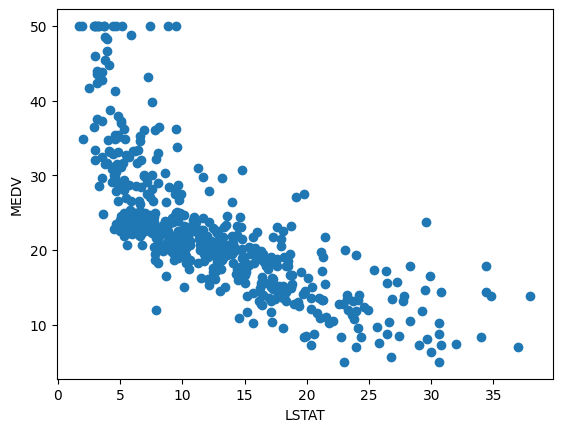

In [12]:
plt.scatter(df['LSTAT'], df['MEDV'], marker='o')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

Text(0, 0.5, 'MEDV')

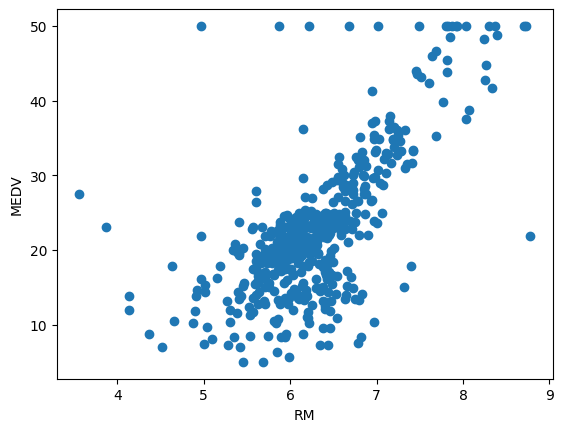

In [13]:
plt.scatter(df['RM'], df['MEDV'], marker='o')
plt.xlabel('RM')
plt.ylabel('MEDV')

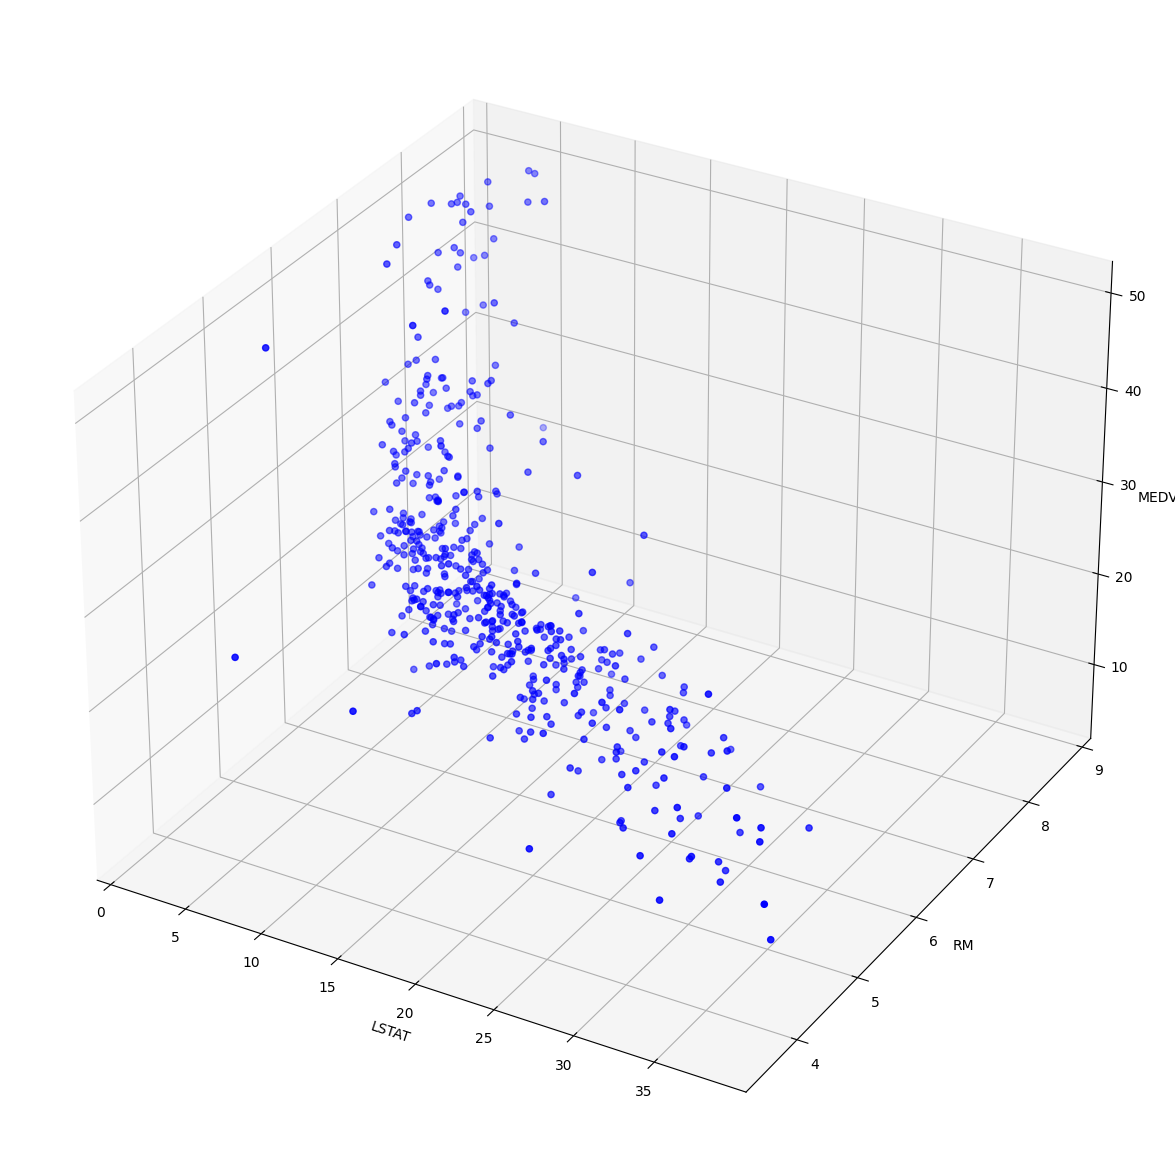

In [14]:
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
 
ax.scatter(df['LSTAT'],
           df['RM'],
           df['MEDV'],
           c='b')
 
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")
plt.show()

In [15]:
x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3, random_state=5)

In [17]:
print(x_train.shape)
print(Y_train.shape)

(354, 2)
(354,)


In [18]:
print(x_test.shape)
print(Y_test.shape)

(152, 2)
(152,)


In [19]:
model = LinearRegression()
model.fit(x_train, Y_train)

LinearRegression()

In [20]:
price_prediction = model.predict(x_test)

In [21]:
print('R-Squared: %.4f' % model.score(x_test,Y_test))

R-Squared: 0.6162


In [22]:
mse = mean_squared_error(Y_test, price_prediction)
mse

36.49422110915324

Text(0.5, 1.0, 'Actual prices vs Predicted prices')

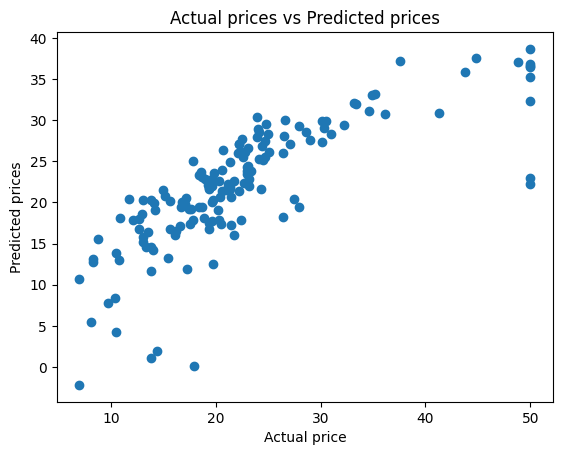

In [23]:
plt.scatter(Y_test, price_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")

In [24]:
print(model.intercept_)
print(model.coef_)

0.3843793678034615
[-0.65957972  4.83197581]


In [25]:
print(model.predict([[30,5]]))

[4.75686695]


/Users/tube/miniconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Plotting the 3D Hyperlane

/Users/tube/miniconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:303: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/Users/tube/miniconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


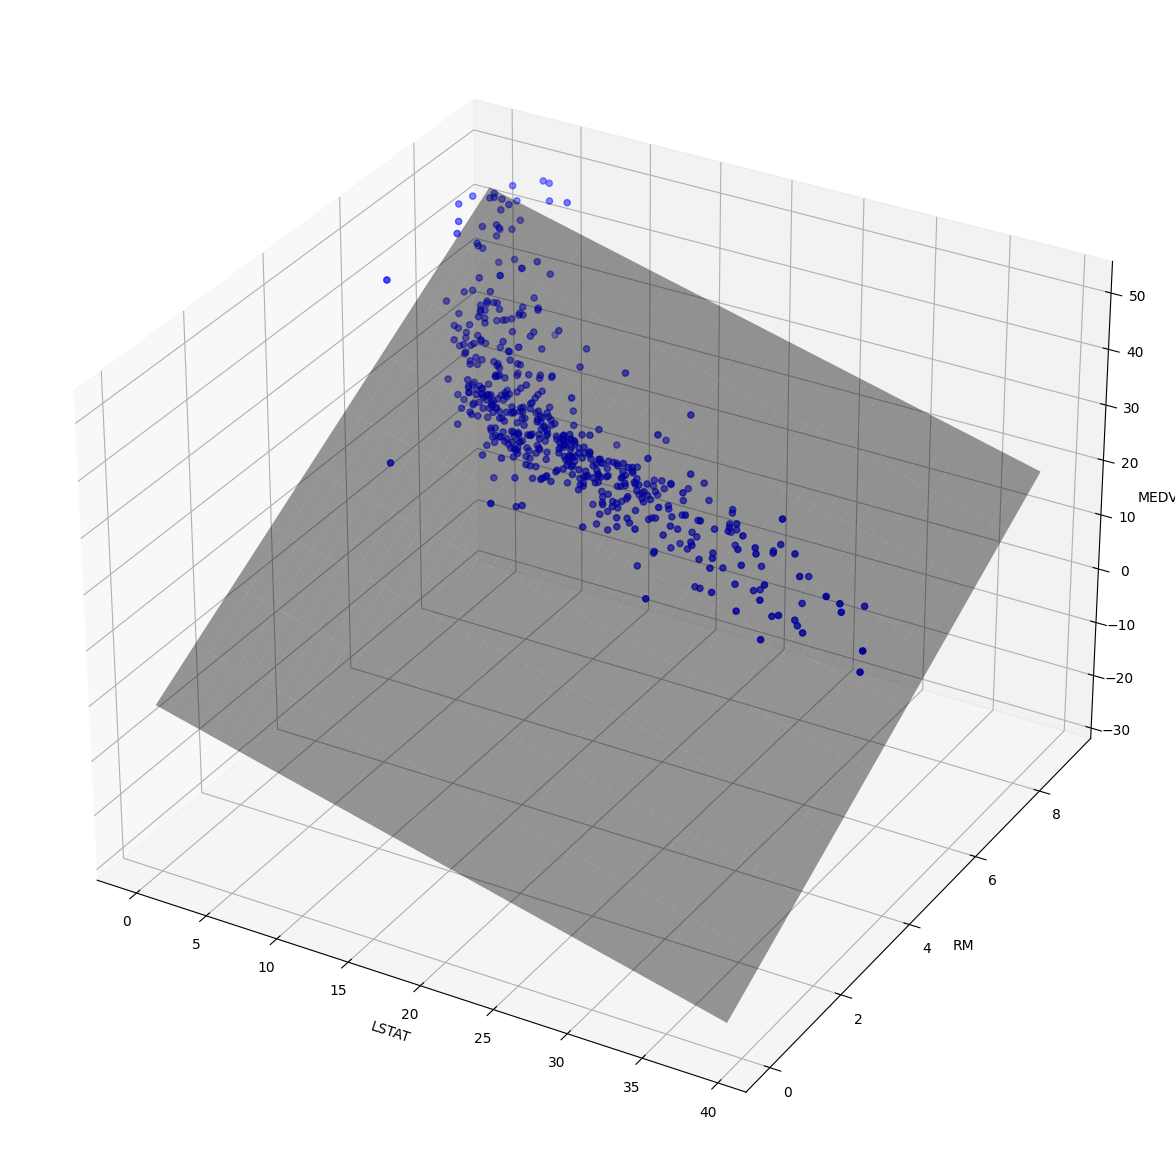

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
 
from sklearn.datasets import fetch_openml

dataset = fetch_openml(name='boston')
 
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target

x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']
 
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
 
ax.scatter(x['LSTAT'],
           x['RM'],
           Y,
           c='b')
 
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")
 
#---create a meshgrid of all the values for LSTAT and RM---
x_surf = np.arange(0, 40, 1)   #---for LSTAT---
y_surf = np.arange(0, 10, 1)   #---for RM---
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, Y)
 
#---calculate z(MEDC) based on the model---
z = lambda x,y: (model.intercept_ + model.coef_[0] * x + model.coef_[1] * y)
 
ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)
 
plt.show()